# Decision Tree Regression Model

They provide a highly effective structure within which you can lay out options and investigate the possible outcomes of choosing those options. They also help you to form a balanced picture of the risks and rewards associated with each possible course of action.

In [1]:
# Importing the dataset
dataset = read.csv('Position_Salaries.csv')
dataset = dataset[2:3]

In [2]:
dataset

Level,Salary
1,45000
2,50000
3,60000
4,80000
5,110000
6,150000
7,200000
8,300000
9,500000
10,1000000


In [27]:
install.packages('rpart')
library(rpart)
regressor = rpart(formula = Salary ~ .,
                  data = dataset,
                  control = rpart.control(minsplit = 1))
regressor

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


n= 10 

node), split, n, deviance, yval
      * denotes terminal node

1) root 10 806622500000  249500  
  2) Level< 8.5 8  55371880000  124375  
    4) Level< 6.5 6   8287500000   82500 *
    5) Level>=6.5 2   5000000000  250000 *
  3) Level>=8.5 2 125000000000  750000  
    6) Level< 9.5 1            0  500000 *
    7) Level>=9.5 1            0 1000000 *

In [28]:
summary(regressor)

Call:
rpart(formula = Salary ~ ., data = dataset, control = rpart.control(minsplit = 1))
  n= 10 

          CP nsplit  rel error   xerror      xstd
1 0.77638626      0 1.00000000 1.234568 0.7835133
2 0.15496716      1 0.22361374 1.148378 0.7931845
3 0.05217357      2 0.06864658 1.120316 0.7968327
4 0.01000000      3 0.01647301 1.120316 0.7968327

Variable importance
Level 
  100 

Node number 1: 10 observations,    complexity param=0.7763863
  mean=249500, MSE=8.066225e+10 
  left son=2 (8 obs) right son=3 (2 obs)
  Primary splits:
      Level < 8.5 to the left,  improve=0.7763863, (0 missing)

Node number 2: 8 observations,    complexity param=0.05217357
  mean=124375, MSE=6.921484e+09 
  left son=4 (6 obs) right son=5 (2 obs)
  Primary splits:
      Level < 6.5 to the left,  improve=0.7600316, (0 missing)

Node number 3: 2 observations,    complexity param=0.1549672
  mean=750000, MSE=6.25e+10 
  left son=6 (1 obs) right son=7 (1 obs)
  Primary splits:
      Level < 9.5 to the left,

In [24]:
# Predicting a new result with Decision Tree Regression
y_pred = predict(regressor, data.frame(Level = 6.5))

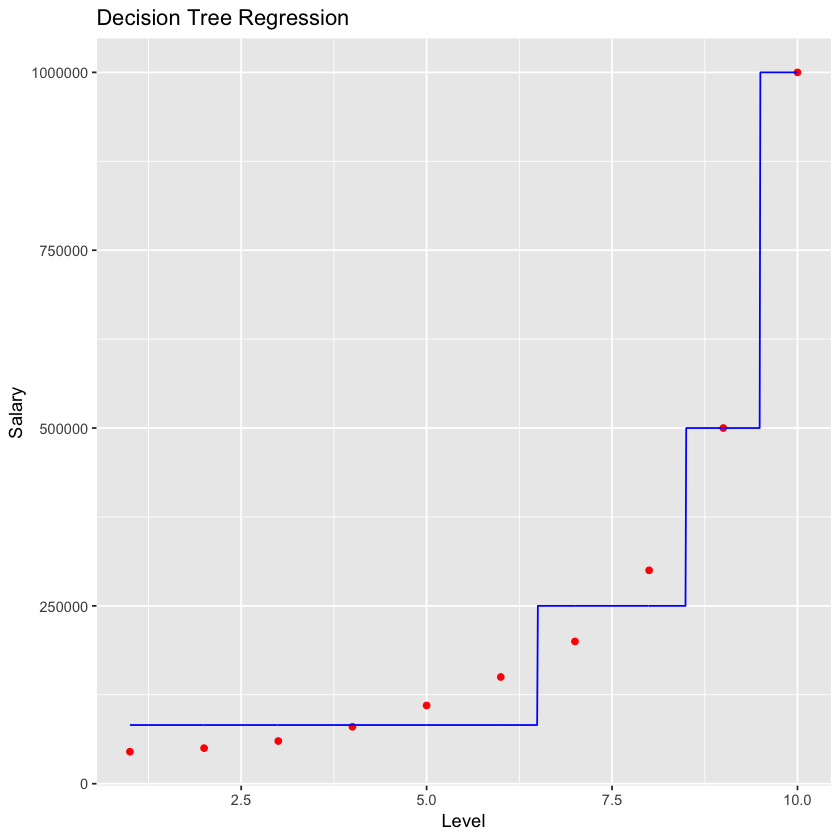

In [29]:
# Visualising the Decision Tree Regression results (higher resolution)
# install.packages('ggplot2')
library(ggplot2)
x_grid = seq(min(dataset$Level), max(dataset$Level), 0.01)
ggplot() +
  geom_point(aes(x = dataset$Level, y = dataset$Salary),
             colour = 'red') +
  geom_line(aes(x = x_grid, y = predict(regressor, newdata = data.frame(Level = x_grid))),
            colour = 'blue') +
  ggtitle('Decision Tree Regression') +
  xlab('Level') +
  ylab('Salary')

**The above diagram represents the non-continuous data with intervals and we can clearly see the intervals (avaerage salaries)**

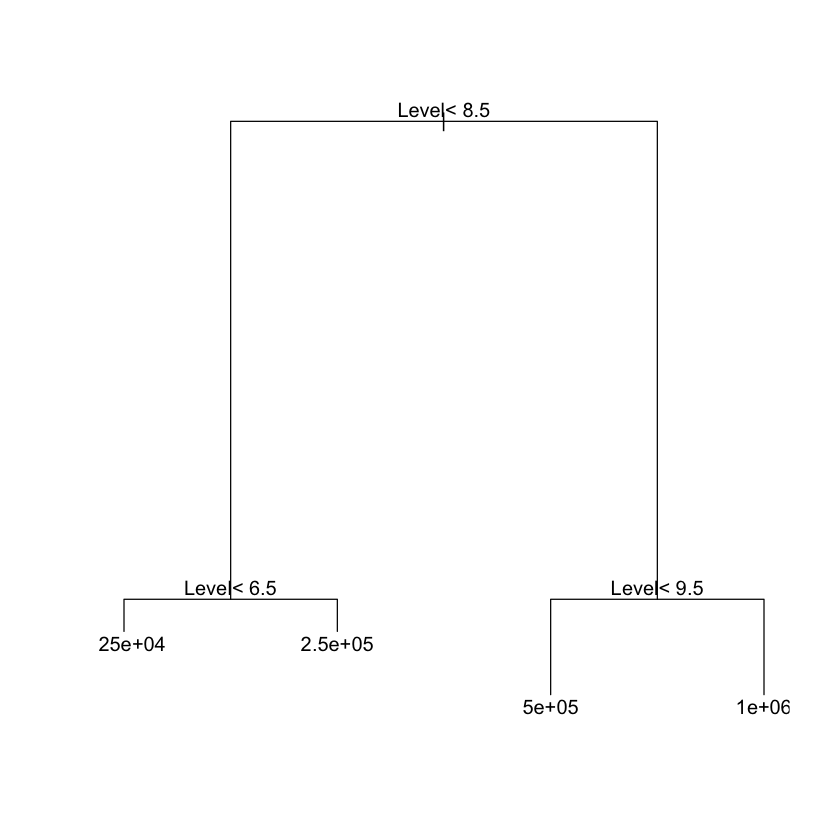

In [26]:
# Plotting the tree
plot(regressor)
text(regressor)